In [1]:
import geopandas as gpd
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import shapely.speedups
import sqlite3
import folium
%config Completer.use_jedi = False #for auto complete code
#https://www.educative.io/answers/how-to-create-a-datetime-column-in-pandas

In [8]:
file ='../data/Automaticas/Para el Consultor Niveles Horarios.xlsx'
xls=pd.ExcelFile(file)
conn = sqlite3.connect('../data/DZ/niveles_automaticos.db')
for hoja in xls.sheet_names:
    df=pd.read_excel(file,sheet_name=hoja)
    table_name='T'+str(np.unique(df.COD).tolist()[0])
    
    cols=['Codigo','Estacion','ano','mes','dia','hora','Nivel']
    df.columns=cols

    cols=['mes','dia','ano','hora']
    dateDF=df[cols]
    dateDF.columns=['month', 'day', 'year','hour']
    df['Fecha Reg']=pd.to_datetime(dateDF)
    cols=['Codigo','Estacion','Fecha Reg','ano','mes','dia','hora','Nivel']
    df = df[cols]
    
    df.to_sql(name = table_name,con=conn, if_exists='replace',index=False)
    conn.commit()
conn.close()

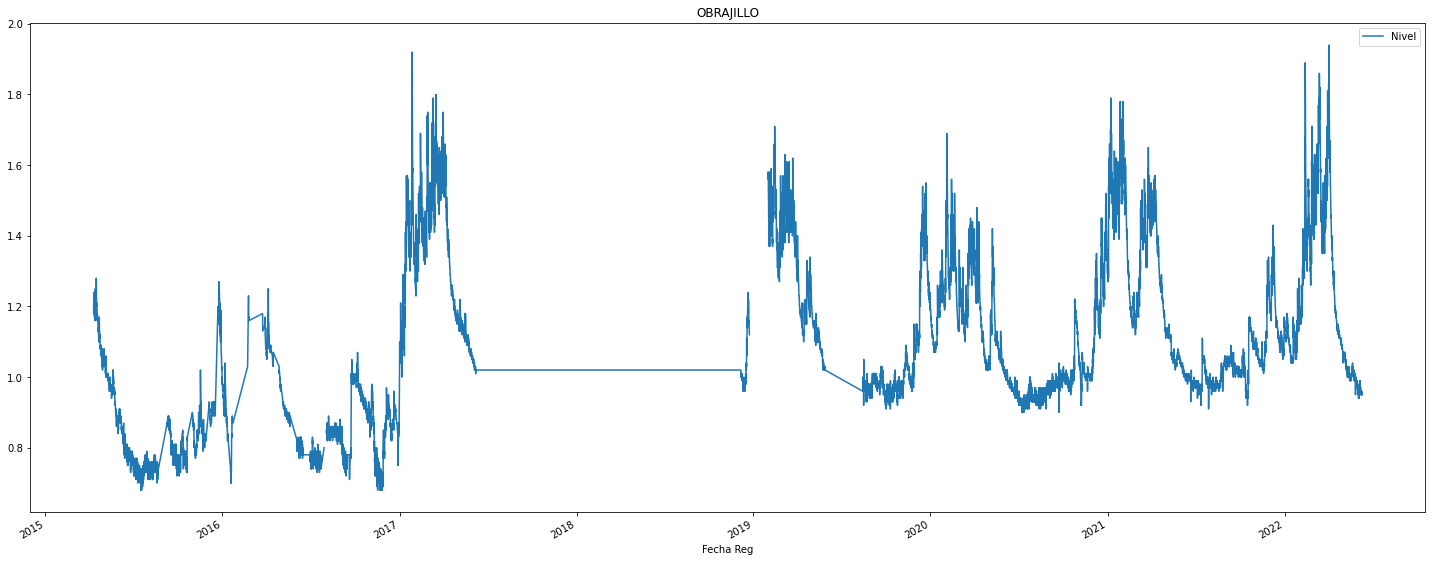

In [11]:
df.plot(x='Fecha Reg',y=['Nivel'],figsize = (25,10),title=xls.sheet_names[-1])
plt.show()

# Estaciones faltantes en el maestro

Estaciones con pocos años de registro estan faltando en el maestro 

In [ ]:
Maestro=Estacion_convencional.get_Maestro()

directory ='../data/DZ/DZ_04_LIMA_NIV/'
table_names = [file.split('.')[0].split('_')[1] for file in os.listdir(directory)]
tables = tables_in_sqlite_db(conn)
#for i,code in enumerate(table_names):
#    print(code,Maestro[Maestro.CODIGO==code][['DZ','NOMBRE_ESTACION']])


filtro=Maestro[Maestro.DZ==4]
name=list(filtro.NOMBRE_ESTACION+' '+filtro.CATEGORIA)
for i,estacion in enumerate(filtro.CODIGO):
    estacion='T'+str(estacion)
    if estacion in tables:
        #print(estacion,name[i])
        print(f'se encuentra en el maestro: {estacion} y nombre {name[i]}')
        tables.remove(estacion)
        pass
    else:
        #print(f'no se encuentra en el maestro: {tables[i]}')
        pass
        
directory ='../data/DZ/DZ_09_SAN_MARTIN_NIV/'
table_names = [file.split('.')[0].split('_')[1] for file in os.listdir(directory)]
filtro=Maestro[Maestro.DZ==9]
name=list(filtro.NOMBRE_ESTACION+' '+filtro.CATEGORIA)
for i,estacion in enumerate(filtro.CODIGO):
    estacion='T'+str(estacion)
    if estacion in tables:
        #print(estacion,name[i])
        print(f'se encuentra en el maestro: {estacion} y nombre {name[i]}')
        tables.remove(estacion)
        pass
    else:
        #print(f'no se encuentra en el maestro: {tables[i]}')
        pass

In [137]:
file ='../data/Automaticas/Para el Consultor Niveles Horarios.xlsx'
xls=pd.ExcelFile(file)
conn = sqlite3.connect('../data/DZ/niveles_automaticos2.db')
for hoja in xls.sheet_names:
    df=pd.read_excel(file,sheet_name=hoja)
    table_name='T'+str(np.unique(df.COD).tolist()[0])
    
    cols=['Codigo','Estacion','ano','mes','dia','hora','Nivel']
    df.columns=cols

    cols=['mes','dia','ano','hora']
    dateDF=df[cols]
    dateDF.columns=['month', 'day', 'year','hour']
    df['Fecha Reg']=pd.to_datetime(dateDF)
    cols=['Codigo','Estacion','Fecha Reg','ano','mes','dia','hora','Nivel']
    df = df[cols]
    
    days=df['Fecha Reg'].dt.to_period('d')
    df['Dates_Day']=days
    u_days=np.unique(days)

    hourly_data={}
    for i in range(24):
        hourly_data[i]=[]

    for dias in u_days:    
        day_filer=df.loc[df['Dates_Day']==dias,:]

        for hour_idx in range(24):
            if hour_idx in day_filer.hora.tolist():
                level=day_filer.loc[df.hora==hour_idx,'Nivel'].tolist()[0]
                hourly_data[hour_idx].append(level)
            else:
                hourly_data[hour_idx].append(np.NaN)

    days_df=pd.DataFrame({'Fecha Reg':days.dt.to_timestamp().unique()})
    level_df=pd.DataFrame(hourly_data)
    level_df.columns=[f'Nivel {col_idx}h' for col_idx in range(24)]
    codigo=np.repeat(df.Codigo.unique().tolist()[0],len(days_df))
    estacion=np.repeat(df.Estacion.unique().tolist()[0],len(days_df))
    gauge=pd.DataFrame({'Codigo':codigo,'Estacion':estacion})
    df_format=pd.concat([gauge,days_df,level_df],axis=1)
    
    df_format.to_sql(name = table_name,con=conn, if_exists='replace',index=False)
    conn.commit()
conn.close()

C:\Users\jose\anaconda3\envs\work_env\lib\site-packages\pandas\core\generic.py:2779: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(
C:\Users\jose\anaconda3\envs\work_env\lib\site-packages\pandas\core\generic.py:2779: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(
C:\Users\jose\anaconda3\envs\work_env\lib\site-packages\pandas\core\generic.py:2779: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(
C:\Users\jose\anaconda3\envs\work_env\lib\site-packages\pandas\core\generic.py:2779: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(
C:\Users\jose\anaconda3\envs\work_env\lib\site-packages\pandas\core\generic.

In [138]:
df_format

,Codigo,Estacion,Fecha Reg,Nivel 0h,Nivel 1h,Nivel 2h,Nivel 3h,Nivel 4h,Nivel 5h,Nivel 6h,...,Nivel 14h,Nivel 15h,Nivel 16h,Nivel 17h,Nivel 18h,Nivel 19h,Nivel 20h,Nivel 21h,Nivel 22h,Nivel 23h
0,47E9F488,OBRAJILLO,2015-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.19,1.19,1.19,1.19,1.22,1.23,1.24,1.24,1.23,1.22
1,47E9F488,OBRAJILLO,2015-04-11,1.23,1.22,1.22,1.21,1.21,1.20,1.20,...,1.19,1.19,1.18,1.19,1.18,1.18,1.18,1.18,1.18,1.18
2,47E9F488,OBRAJILLO,2015-04-12,1.18,1.18,1.18,1.18,1.17,1.18,1.18,...,1.17,1.17,1.16,1.16,1.17,1.17,1.18,1.19,1.20,1.19
3,47E9F488,OBRAJILLO,2015-04-13,1.18,1.18,1.18,1.18,1.18,1.18,1.18,...,1.16,1.17,1.17,1.17,1.17,1.18,1.20,1.24,1.25,1.24
4,47E9F488,OBRAJILLO,2015-04-14,1.22,1.21,1.21,1.20,1.20,1.19,1.19,...,1.18,1.18,1.18,1.19,1.19,1.22,1.24,1.24,1.23,1.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,47E9F488,OBRAJILLO,2022-06-05,0.98,0.98,0.98,0.98,0.99,0.98,0.99,...,0.98,0.98,0.98,0.98,0.99,0.98,0.98,0.99,0.98,0.98
1828,47E9F488,OBRAJILLO,2022-06-06,0.98,0.98,0.98,0.98,0.98,0.98,0.98,...,0.97,0.97,0.97,0.97,0.97,0.97,0.97,0.97,0.97,0.97
1829,47E9F488,OBRAJILLO,2022-06-07,0.97,0.97,0.97,0.97,0.97,0.97,0.97,...,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96
1830,47E9F488,OBRAJILLO,2022-06-08,0.96,0.96,0.95,0.96,0.96,0.96,0.96,...,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95
